In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import sklearn.linear_model

import warnings
warnings.filterwarnings("ignore")

import wrangle
import env
import evaluate
import split_scale
import explore
import feature_engineering


## Using the data on student grades from this lesson, complete the following:

importing csv

In [2]:
urlfile = 'https://raw.githubusercontent.com/CodeupClassroom/curie-ds-methodologies/master/regression/student_grades.csv'
df = pd.read_csv(urlfile, error_bad_lines=False)

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


exploring and cleaning data

In [4]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [5]:
df = df.dropna(how='any', axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 103
Data columns (total 5 columns):
student_id     103 non-null int64
exam1          103 non-null float64
exam2          103 non-null int64
exam3          103 non-null object
final_grade    103 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [7]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [8]:
df = df.replace('', df.exam3.mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 103
Data columns (total 5 columns):
student_id     103 non-null int64
exam1          103 non-null float64
exam2          103 non-null int64
exam3          103 non-null object
final_grade    103 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.8+ KB


In [10]:
df['exam3'] = df.exam3.astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 103
Data columns (total 5 columns):
student_id     103 non-null int64
exam1          103 non-null float64
exam2          103 non-null int64
exam3          103 non-null float64
final_grade    103 non-null int64
dtypes: float64(2), int64(3)
memory usage: 4.8 KB


### 1.) Split the data into train and test datasets.

In [12]:
train, test = split_scale.split_my_data(df)

### 2.) Create a model that uses exam 1 to predict the final grade.

In [13]:
X_train = df.drop(columns='final_grade')
y_train = df[['final_grade']]
X_test = df.drop(columns='final_grade')
y_test = df[['final_grade']]

In [14]:
exam1 = pd.DataFrame({
    'actual': train.final_grade
})
exam1.head()

,actual
20,76
8,77
70,81
93,87
67,87


In [15]:
X = train[['exam1']]
y = train.final_grade

lm = sklearn.linear_model.LinearRegression()

lm.fit(X, y)

exam1['simple_lm'] = lm.predict(X)

In [16]:
exam1.head()

,actual,simple_lm
20,76,77.610630
8,77,75.352466
70,81,82.126958
93,87,86.643286
67,87,86.643286


In [17]:
lm.coef_, lm.intercept_

(array([0.75272137]), 22.661970095206918)

In [18]:
print('final_grade = {:.3f} * exam1 + {:.3f}'.format(lm.coef_[0], lm.intercept_))

final_grade = 0.753 * exam1 + 22.662


In [19]:
x_pred = np.array([-25, 100]).reshape(-1, 1)
y_pred = lm.predict(x_pred)

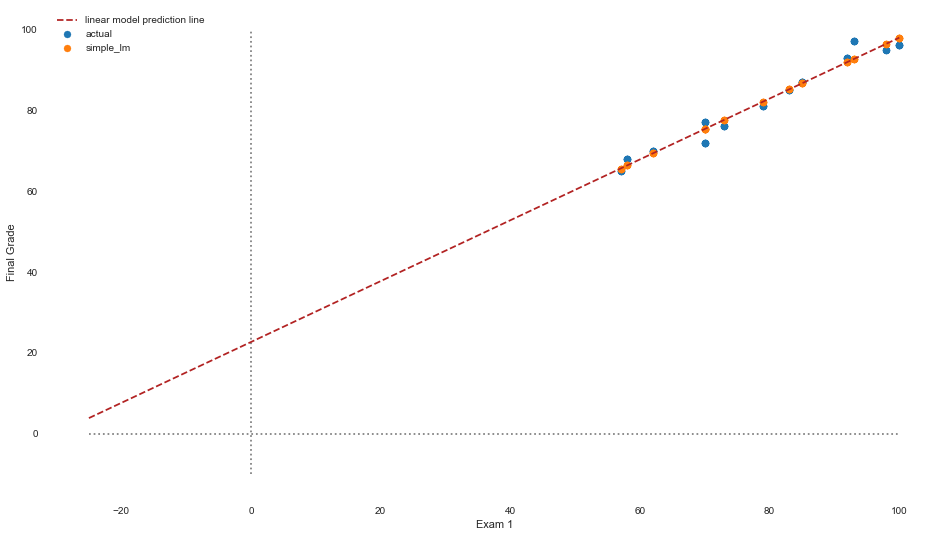

In [20]:
plt.figure(figsize=(16,9))

plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, exam1.simple_lm, label='simple_lm')
plt.plot(x_pred, y_pred, c='firebrick', ls='--', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel("Exam 1")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

### 3.) Create a model that uses exam 2 to predict the final grade.

In [21]:
exam2 = pd.DataFrame({
    'actual': train.final_grade
})
exam2.head()

,actual
20,76
8,77
70,81
93,87
67,87


In [22]:
X2 = train[['exam2']]
y2 = train.final_grade

lm2 = sklearn.linear_model.LinearRegression()

lm2.fit(X2, y2)

exam2['simple_lm'] = lm2.predict(X2)

In [23]:
exam2.head()

,actual,simple_lm
20,76,74.374331
8,77,69.397017
70,81,74.374331
93,87,87.315347
67,87,87.315347


In [24]:
lm2.coef_, lm2.intercept_

(array([0.99546277]), 4.691936947494284)

In [25]:
print('final_grade = {:.3f} * exam2 + {:.3f}'.format(lm.coef_[0], lm.intercept_))

final_grade = 0.753 * exam2 + 22.662


In [26]:
X2_pred = np.array([-25, 100]).reshape(-1, 1)
y2_pred = lm2.predict(X2_pred)

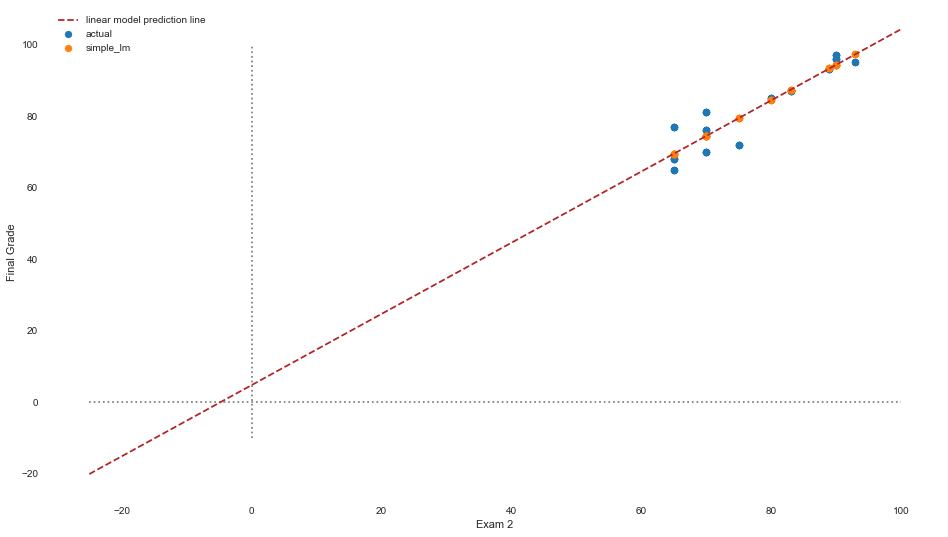

In [27]:
plt.figure(figsize=(16,9))

plt.scatter(train.exam2, train.final_grade, label='actual')
plt.scatter(train.exam2, exam2.simple_lm, label='simple_lm')
plt.plot(X2_pred, y2_pred, c='firebrick', ls='--', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel("Exam 2")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

### 4.) Compare your models in the following manner:


- Calculate the mean squared error

In [28]:
predictions = pd.DataFrame({
    'actual': train.final_grade,
    'exam1_simple_lm' : exam1.simple_lm,
    'exam2_simple_lm' : exam2.simple_lm,
    'exam1_baseline' : train.exam1.mean(),
    'exam2_baseline' : train.exam2.mean()
})

In [29]:
predictions.head()

,actual,exam1_simple_lm,exam2_simple_lm,exam1_baseline,exam2_baseline
20,76,77.610630,74.374331,78.280488,77.243902
8,77,75.352466,69.397017,78.280488,77.243902
70,81,82.126958,74.374331,78.280488,77.243902
93,87,86.643286,87.315347,78.280488,77.243902
67,87,86.643286,87.315347,78.280488,77.243902


In [30]:
exam1_MSE = mean_squared_error(predictions.actual, predictions.exam1_simple_lm)

In [31]:
exam2_MSE = mean_squared_error(predictions.actual, predictions.exam2_simple_lm)

In [32]:
print(f"exam1's MSE: {exam1_MSE}, exam2's MSE: {exam2_MSE}")

exam1's MSE: 3.6483235412458406, exam2's MSE: 16.32038928588756


- Visualize the residuals. Create a seperate visualization for each model.

In [33]:
exam1.head()

,actual,simple_lm
20,76,77.610630
8,77,75.352466
70,81,82.126958
93,87,86.643286
67,87,86.643286


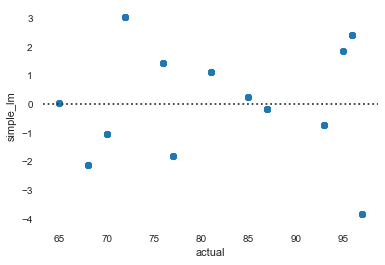

In [34]:
evaluate.plot_residuals(exam1, 'actual', 'simple_lm')

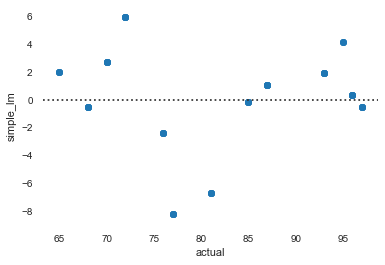

In [35]:
evaluate.plot_residuals(exam2, 'actual', 'simple_lm')

- Visualize the actual vs the predicted values. Create a seperate visualization for each model.

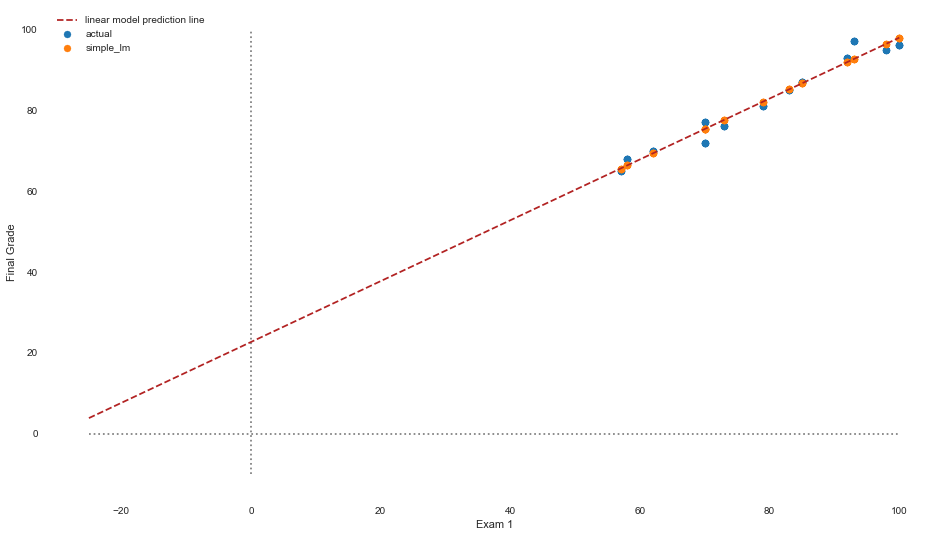

In [36]:
plt.figure(figsize=(16,9))

plt.scatter(train.exam1, train.final_grade, label='actual')
plt.scatter(train.exam1, exam1.simple_lm, label='simple_lm')
plt.plot(x_pred, y_pred, c='firebrick', ls='--', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel("Exam 1")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

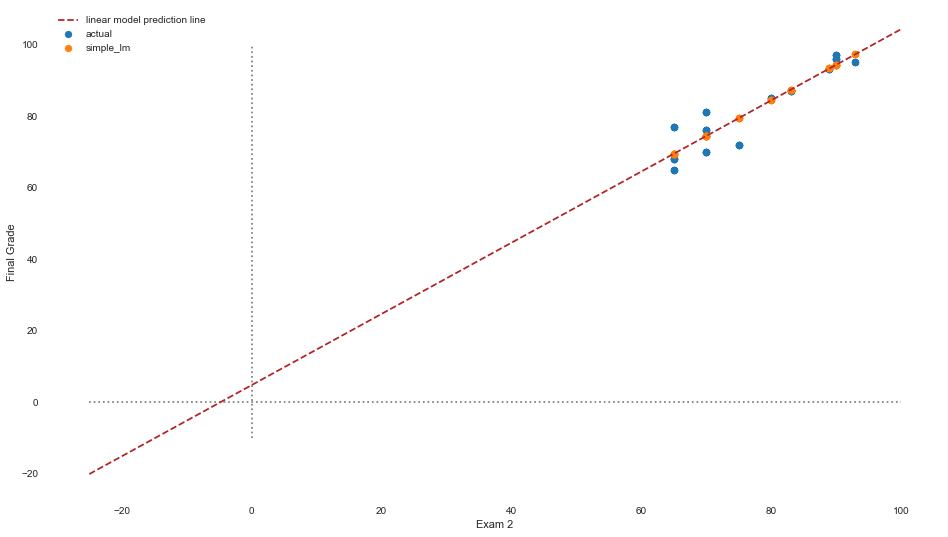

In [37]:
plt.figure(figsize=(16, 9))

plt.scatter(train.exam2, train.final_grade, label='actual')
plt.scatter(train.exam2, exam2.simple_lm, label='simple_lm')
plt.plot(X2_pred, y2_pred, c='firebrick', ls='--', label='linear model prediction line')
plt.hlines(0, -25, 100, ls=':', color='grey')
plt.vlines(0, -10, 100, ls=':', color='grey')

plt.xlabel("Exam 2")
plt.ylabel("Final Grade")
plt.legend()
plt.show()

- Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

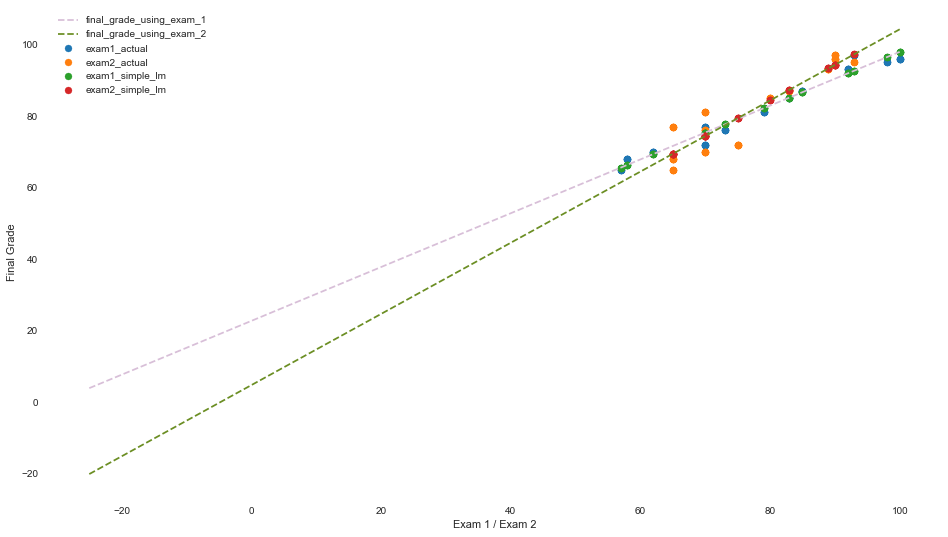

In [38]:
plt.figure(figsize=(16, 9))
plt.scatter(train.exam1, train.final_grade, label='exam1_actual')
plt.scatter(train.exam2, train.final_grade, label='exam2_actual')
plt.scatter(train.exam1, exam1.simple_lm, label='exam1_simple_lm')
plt.scatter(train.exam2, exam2.simple_lm, label='exam2_simple_lm')
plt.plot(x_pred, y_pred, ls='--', c='thistle', label='final_grade_using_exam_1')
plt.plot(X2_pred, y2_pred, ls='--', c='olivedrab', label='final_grade_using_exam_2')

plt.xlabel('Exam 1 / Exam 2')
plt.ylabel('Final Grade')
plt.legend()
plt.show()

### 5.) Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [39]:
X3 = train.drop(columns='final_grade')
y3 = train.final_grade

lm3 = sklearn.linear_model.LinearRegression()
k = 2

# 1. Transform our X
rfe = sklearn.feature_selection.RFE(lm3, 2)
rfe.fit(X3, y3)
print('selected top 2 features:', X3.columns[rfe.support_])
X_rfe = rfe.transform(X3)

# 2. Use the transformed x in our model
lm3.fit(X_rfe, y3)

predictions['multiple_rfe'] = lm3.predict(X_rfe)

predictions.head()

selected top 2 features: Index(['exam1', 'exam3'], dtype='object')


,actual,exam1_simple_lm,exam2_simple_lm,exam1_baseline,exam2_baseline,multiple_rfe
20,76,77.610630,74.374331,78.280488,77.243902,75.839723
8,77,75.352466,69.397017,78.280488,77.243902,74.999544
70,81,82.126958,74.374331,78.280488,77.243902,82.304722
93,87,86.643286,87.315347,78.280488,77.243902,86.377401
67,87,86.643286,87.315347,78.280488,77.243902,86.377401


In [40]:
lm3.coef_, lm3.intercept_

(array([0.57909975, 0.29904007]), 11.13743610591284)

In [41]:
print(f'final_grade = {lm3.coef_[0]:.2f} x exam1 + {lm3.coef_[1]:.2f} x exam3 + {lm3.intercept_:.2f}')


final_grade = 0.58 x exam1 + 0.30 x exam3 + 11.14


In [42]:
predictions.head()

,actual,exam1_simple_lm,exam2_simple_lm,exam1_baseline,exam2_baseline,multiple_rfe
20,76,77.610630,74.374331,78.280488,77.243902,75.839723
8,77,75.352466,69.397017,78.280488,77.243902,74.999544
70,81,82.126958,74.374331,78.280488,77.243902,82.304722
93,87,86.643286,87.315347,78.280488,77.243902,86.377401
67,87,86.643286,87.315347,78.280488,77.243902,86.377401


In [43]:
multi_reg_MSE = mean_squared_error(predictions.actual, predictions.multiple_rfe)

In [44]:
print(f"exam1's MSE: {exam1_MSE}, exam2's MSE: {exam2_MSE}, multiple regression MSE: {multi_reg_MSE}")

exam1's MSE: 3.6483235412458406, exam2's MSE: 16.32038928588756, multiple regression MSE: 3.003576829064554


### 6.) Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [48]:
X4 = train[['exam1', 'exam3']]
y4 = train.final_grade

lm4 = LinearRegression().fit(X4, y4)

y_test = test.final_grade
y_test_predicted = lm4.predict(test[['exam1', 'exam3']])

mse = mean_squared_error(y_test, y_test_predicted)

## Our scenario continues:

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

### 1.) Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

### 2.) Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

### 3.) Evaluate the models and your baseline.

### 4.) Select the model that performed the best, and apply it to your test data.